<img src="img/FIFA-19.jpg" style="width:100%; height:400px">

# <center><i><h1> SOCCER REGRESSION</h1></i></center>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.metrics import *
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import time
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import *
from sklearn.cluster import KMeans 
from sklearn.cluster import DBSCAN

%matplotlib inline

# <i><h5>DATASET DE FIFA 19</h5></i>

In [2]:
d = pd.read_csv("data/datasetcsv2.csv")
print d.shape
d.head()

(1999, 54)


,Rankig,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,1,L. Messi,31,Argentina,94,94,FC Barcelona,110500000,565000,Left,...,96,33,28,26,6,11,15,14,8,226500000
1,2,Cristiano Ronaldo,33,Portugal,94,94,Juventus,77000000,405000,Right,...,95,28,31,23,7,11,15,14,11,127100000
2,3,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,118500000,290000,Right,...,94,27,24,33,9,9,15,15,11,228100000
3,4,De Gea,27,Spain,91,93,Manchester United,72000000,260000,Right,...,68,15,21,13,90,85,87,88,94,138600000
4,5,K. De Bruyne,27,Belgium,91,92,Manchester City,102000000,355000,Right,...,88,68,58,51,15,13,5,10,13,196400000


# <i><h5>PROBLEMAS DE REGRESIÓN</h5></i>

1. Predecir el costo de un jugador de fútbol, su salario, y su claúsula de rescisión, según sus aptitudes futbolísticas.
2. Predecir la proyección de un jugador en los siguientes años, en pocas palabras, predecir su valoración a futuro(Muy útil para    jugadores jóvenes).

# <i><h5>PROBLEMA DE CLASIFICACIÓN</h5></i>

1. Clasificar, según las aptitudes futbolísticas de un jugador, la posición en el terreno de juego, en la cuál tendría un mayor rendimiento competitivo y estratégico.

# <i><h5>INFORMACIÓN INTERESANTE</h5></i>

 1. Estudiar el dataset y encontrar datos de gran interés como: <br>
   1.1 Correlaciones <br>
   1.2 Comparaciones <br>
   1.3 Entre otras <br>
   1.4 Mapeo global de resultados del análisis de datos <br>

# <i><h5>TRATAMIENTO DE DATOS</h5></i>

Se optimizó el dataset, eliminando filas con espacios, con datos erróneos en cuanto a su tipado, y otras características que no permitían realizar un buen análisis de datos.

# <i><h5>Estimación del costo de un jugador según sus aptitudes futbolísticas</h5></i>

In [3]:
X = d.values[:,[2, 4, 5, 8, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
               38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
y = d.values[:, [7]]
y=y.astype('int')

print X.shape
print y.shape

(1999, 43)
(1999, 1)


In [4]:
dti = DecisionTreeClassifier(max_depth=5)
dti.fit(X,y)
print dti.score(X,y)

0.258629314657


In [5]:
dt =DecisionTreeClassifier()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

0.245


In [6]:
dt =SVC()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

/opt/miniconda/lib/python2.7/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.055


In [7]:
dt =RandomForestClassifier()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.111


In [8]:
from sklearn.pipeline import Pipeline

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

p = Pipeline((("pca", PCA(n_components=3)), ("classifier", GaussianNB()) ))

p.fit(Xtr, ytr)

print "TRAIN accuracy %.3f"%p.score(Xtr, ytr)
print "TEST  accuracy %.3f"%p.score(Xts, yts)

TRAIN accuracy 0.108
TEST  accuracy 0.030


# <i><h5>Prueba local con Brayan CepeCrack</h5></i>  

In [9]:
xi=[21, 40, 42, 282.76, 0, 2, 2, 5.8, 165.34, 40, 40, 50, 70, 50, 60, 70, 60, 80, 40, 70, 60, 50, 60, 
    68, 50, 35, 50, 60, 70, 65, 70, 80, 80, 70, 60, 
    50, 60, 3, 3, 10, 6, 7, 565.52]

xi=np.asarray(xi)

print xi.shape

xi=np.reshape(xi, (1, 43))

(43,)


In [10]:
yi = dti.predict(xi)
print yi

[7000000]


# <i><h5>Puntaje de proyección de un jugador para la siguiente temporada(Índice de proyección)</h5></i>

Dato importante: Analizando que la característica "costo de jugador" está muy excenta de el presente del jugador y de sus aptitudes futbolísticas, se decidió no incluirala en las características para el problema de regresión.

In [11]:
X = d.values[:,[2, 4, 8, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
               38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
y = d.values[:, [5]]
y=y.astype('int')

print X.shape
print y.shape

(1999, 42)
(1999, 1)


In [12]:
dti = DecisionTreeClassifier(max_depth=5)
dti.fit(X,y)
print dti.score(X,y)

0.497748874437


In [13]:
dt =DecisionTreeClassifier()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

0.507


In [14]:
dt =SVC()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

0.123


In [15]:
dt =RandomForestClassifier()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.318


In [16]:
from sklearn.pipeline import Pipeline

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

p = Pipeline((("pca", PCA(n_components=3)), ("classifier", GaussianNB()) ))

p.fit(Xtr, ytr)

print "TRAIN accuracy %.3f"%p.score(Xtr, ytr)
print "TEST  accuracy %.3f"%p.score(Xts, yts)

TRAIN accuracy 0.165
TEST  accuracy 0.132


# <i><h5>Prueba local con Brayan CepeCrack</h5></i>  

In [17]:
xi=[21, 60, 282.76, 0, 2, 2, 5.8, 165.34, 40, 40, 50, 70, 50, 60, 70, 60, 80, 40, 70, 60, 50, 60, 
    68, 50, 35, 50, 60, 70, 65, 70, 80, 80, 70, 60, 
    50, 60, 3, 3, 10, 6, 7, 565.52]

xi=np.asarray(xi)

print xi.shape

xi=np.reshape(xi, (1, 42))

(42,)


In [18]:
yi = dti.predict(xi)
print yi

[84]


# <i><h5>Clasificación de la óptima posición de un jugador en un equipo de fútbol</h5></i>

Para solucionar este problema de clasificación y etiquetar la posición óptima de un jugador según sus aptitudes físicas y futbolísticas, se necesita enumerar las posiciones(alterar el dataset) para que sea óptimo aplicar los algoritmos de clasificación.

1 CAM - Mediocentro ofensivo <br>
2 CB –  Central <br>
3 CDM - Mediocentro defensivo <br>
4 CF –  Delantero centro <br>
5 CM –  Centrocampista <br>
6 GK –  Guardameta <br>
7 LAM – Interior Izquierdo <br>
8 LB –  Lateral izquierdo <br>
9 LCB – Central izquierdo <br>
10 LCM – Centrocampista izquierdo <br>
11 LDM - Mediocentro defensivo izquierdo <br>
12 LF –  Delantero izquierdo <br>
13 LM –  Volante izquierdo <br>
14 LS -  Delantero izquierdo <br>
15 LW -  Extremo izquierdo <br>
16 LWB – Carrilero izquierdo <br>
17 RAM – Centrocampista ofensivo derecho <br>
18 RB –  Lateral derecho <br>
19 RCB – Central derecho <br>
20 RCM – Centrocampista derecho <br>
21 RDM - Mediocentro defensivo derecho <br>
22 RF –  Delantero derecho <br>
23 RM –  Volante derecho <br>
24 RS -  Delantero derecho <br>
25 RW -  Extremo derecho <br>
26 RWB – Carrilero derecho <br>
27 ST –  Segundo delantero <br>

In [19]:
d.loc[d['Position']=='CAM','Position']=1
d.loc[d['Position']=='CB','Position']=2
d.loc[d['Position']=='CDM','Position']=3
d.loc[d['Position']=='CF','Position']=4
d.loc[d['Position']=='CM','Position']=5
d.loc[d['Position']=='GK','Position']=6
d.loc[d['Position']=='LAM','Position']=7
d.loc[d['Position']=='LB','Position']=8
d.loc[d['Position']=='LCB','Position']=9
d.loc[d['Position']=='LCM','Position']=10
d.loc[d['Position']=='LDM','Position']=11
d.loc[d['Position']=='LF','Position']=12
d.loc[d['Position']=='LM','Position']=13
d.loc[d['Position']=='LS','Position']=14
d.loc[d['Position']=='LW','Position']=15
d.loc[d['Position']=='LWB','Position']=16
d.loc[d['Position']=='RAM','Position']=17
d.loc[d['Position']=='RB','Position']=18
d.loc[d['Position']=='RCB','Position']=19
d.loc[d['Position']=='RCM','Position']=20
d.loc[d['Position']=='RDM','Position']=21
d.loc[d['Position']=='RF','Position']=22
d.loc[d['Position']=='RM','Position']=23
d.loc[d['Position']=='RS','Position']=24
d.loc[d['Position']=='RW','Position']=25
d.loc[d['Position']=='RWB','Position']=26
d.loc[d['Position']=='ST','Position']=27
d['Position']

0       22
1       27
2       15
3        6
4       20
5       12
6       20
7       24
8       19
9        6
10      27
11      10
12       2
13      10
14      11
15      12
16      27
17       1
18       6
19       6
20       3
21      14
22       6
23      27
24       9
25      23
26      23
27       3
28      15
29      15
        ..
1969     3
1970    13
1971    18
1972     6
1973    10
1974     3
1975    21
1976    18
1977     2
1978    13
1979    19
1980     8
1981    11
1982     5
1983     5
1984    14
1985    27
1986     9
1987    27
1988     3
1989     8
1990    27
1991    20
1992     6
1993    27
1994    13
1995     8
1996     2
1997    26
1998    27
Name: Position, Length: 1999, dtype: int64

In [20]:
X = d.values[:,[2, 4, 5, 8, 10, 11, 12, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37,
               38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52]]
y = d.values[:, [14]]
y=y.astype('int')

print X.shape
print y.shape

(1999, 43)
(1999, 1)


In [21]:
dti = DecisionTreeClassifier(max_depth=5)
dti.fit(X,y)
print dti.score(X,y)

0.440220110055


In [22]:
dt =DecisionTreeClassifier()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

0.318


In [23]:
dt =SVC()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

0.086


In [24]:
dt =RandomForestClassifier()

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

dt.fit(Xtr,ytr)
print dt.score(Xts,yts)

/opt/miniconda/lib/python2.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


0.378


In [25]:
from sklearn.pipeline import Pipeline

Xtr, Xts, ytr, yts = train_test_split(X,y, test_size=.5)

p = Pipeline((("pca", PCA(n_components=3)), ("classifier", GaussianNB()) ))

p.fit(Xtr, ytr)

print "TRAIN accuracy %.3f"%p.score(Xtr, ytr)
print "TEST  accuracy %.3f"%p.score(Xts, yts)

TRAIN accuracy 0.342
TEST  accuracy 0.323


# <i><h5>Prueba local con Brayan CepeCrack</h5></i> 

In [26]:
xi=[21, 40, 42, 282.76, 0, 2, 2, 5.8, 165.34, 40, 40, 50, 70, 50, 60, 70, 60, 80, 40, 70, 60, 50, 60, 
    68, 50, 35, 50, 60, 70, 65, 70, 80, 80, 70, 60, 
    50, 60, 3, 3, 10, 6, 7, 565.52]

xi=np.asarray(xi)

print xi.shape

xi=np.reshape(xi, (1, 43))

(43,)


In [27]:
yi = dti.predict(xi)
print yi

[1]


# <i><h5>Analítica de datos(Cluster)</h5></i>

Para realizar aprendizaje no supervisado, con respecto a analizar la correspondencia de la proyección de jugadores
con su nacionalidad, nos ayudaría a predecir tal vez los futuros campeones de campeonatos mundiales de este deporte en un
plazo de largo alcance.

Potencial en función de nacionalidad del jugador

1.Albania  2.Algeria  3.Angola  4.Argentina  5.Armenia  6.Australia  7.Austria
8.Belarus  9.Belgium  10.Benin  11.Bosnia Herzegovina  12.Brazil  13. Bulgaria  14.Burkina Faso
15.Cameroon  16.Canada  17.Cape Verde  18.Central African Rep.  19.Chile  20.China PR  21.Colombia 
22.Congo  23.Costa Rica  24.Croatia  25.Cuba  26.Cyprus  27.Czech Republic  28.DR Congo  29.Denmark
30.Dominican Republic  31.Ecuador 32.Egypt  33.England  34.Equatorial Guinea  35.Estonia  36.FYR Macedonia
37.Finland  38.France 39.Gabon  40.Gambia  41.Georgia  42.Germany  43.Ghana  44.Greece  45.Guinea  46.Guinea Bissau 47.Honduras  48.Hungary  49.Iceland  50.Iran  51.Israel  52.Italy  53.Ivory Coast  54.Jamaica  55.Japan  56.Kenya
57.Korea Republic  58.Kosovo  59.Madagascar  60.Mali  61.Mexico  62.Montenegro  63.Morocco  64.Mozambique
65.Netherlands  66.New Zealand  67.Nigeria  68.Northern Ireland  69.Norway 70.Paraguay  71.Peru  72.Poland  73.Portugal 74.Repubulic of Ireland  75.Romania  76.Russia  77.Saudi Arabia  78.Scotland  79.Senegal  80.Serbia  81.Slovakia
82.Slovenia 83.South Africa  84.Spain  85.Sweden  86.Switzerland  87.Syria 88.Tanzania  89.Togo  90.Tunisia
91.Turkey  92.Ukraine  93.United Arab Emirates  94.United States  95.Uruguay  96.Uzbekistan
97.Venezuela  98.Wales  99.Zimbabwe

In [28]:
print np.unique(d.values[ : , [3] ])

['Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Belarus' 'Belgium' 'Benin' 'Bosnia Herzegovina' 'Brazil' 'Bulgaria'
 'Burkina Faso' 'Cameroon' 'Canada' 'Cape Verde' 'Central African Rep.'
 'Chile' 'China PR' 'Colombia' 'Congo' 'Costa Rica' 'Croatia' 'Cuba'
 'Cyprus' 'Czech Republic' 'DR Congo' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'England' 'Equatorial Guinea' 'Estonia' 'FYR Macedonia'
 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece'
 'Guinea' 'Guinea Bissau' 'Honduras' 'Hungary' 'Iceland' 'Iran' 'Israel'
 'Italy' 'Ivory Coast' 'Jamaica' 'Japan' 'Kenya' 'Korea Republic' 'Kosovo'
 'Madagascar' 'Mali' 'Mexico' 'Montenegro' 'Morocco' 'Mozambique'
 'Netherlands' 'New Zealand' 'Nigeria' 'Northern Ireland' 'Norway'
 'Paraguay' 'Peru' 'Poland' 'Portugal' 'Republic of Ireland' 'Romania'
 'Russia' 'Saudi Arabia' 'Scotland' 'Senegal' 'Serbia' 'Slovakia'
 'Slovenia' 'South Africa' 'Spain' 'Sweden' 'Switzerland' 'Syria'
 'Tanzania' '

In [29]:
d.loc[d['Nationality']=='Albania','Nationality']=1
d.loc[d['Nationality']=='Algeria','Nationality']=2
d.loc[d['Nationality']=='Angola','Nationality']=3
d.loc[d['Nationality']=='Argentina','Nationality']=4
d.loc[d['Nationality']=='Armenia','Nationality']=5
d.loc[d['Nationality']=='Australia','Nationality']=6
d.loc[d['Nationality']=='Austria','Nationality']=7
d.loc[d['Nationality']=='Belarus','Nationality']=8
d.loc[d['Nationality']=='Belgium','Nationality']=9
d.loc[d['Nationality']=='Benin','Nationality']=10
d.loc[d['Nationality']=='Bosnia Herzegovina','Nationality']=11
d.loc[d['Nationality']=='Brazil','Nationality']=12
d.loc[d['Nationality']=='Bulgaria','Nationality']=13
d.loc[d['Nationality']=='Burkina Faso','Nationality']=14
d.loc[d['Nationality']=='Cameroon','Nationality']=15
d.loc[d['Nationality']=='Canada','Nationality']=16
d.loc[d['Nationality']=='Cape Verde','Nationality']=17
d.loc[d['Nationality']=='Central African Rep.','Nationality']=18
d.loc[d['Nationality']=='Chile','Nationality']=19
d.loc[d['Nationality']=='China PR','Nationality']=20
d.loc[d['Nationality']=='Colombia','Nationality']=21
d.loc[d['Nationality']=='Congo','Nationality']=22
d.loc[d['Nationality']=='Costa Rica','Nationality']=23
d.loc[d['Nationality']=='Croatia','Nationality']=24
d.loc[d['Nationality']=='Cuba','Nationality']=25
d.loc[d['Nationality']=='Cyprus','Nationality']=26
d.loc[d['Nationality']=='Czech Republic','Nationality']=27
d.loc[d['Nationality']=='DR Congo','Nationality']=28
d.loc[d['Nationality']=='Denmark','Nationality']=29
d.loc[d['Nationality']=='Dominican Republic','Nationality']=30
d.loc[d['Nationality']=='Ecuador','Nationality']=31
d.loc[d['Nationality']=='Egypt','Nationality']=32
d.loc[d['Nationality']=='England','Nationality']=33
d.loc[d['Nationality']=='Equatorial Guinea','Nationality']=34
d.loc[d['Nationality']=='Estonia','Nationality']=35
d.loc[d['Nationality']=='FYR Macedonia','Nationality']=36
d.loc[d['Nationality']=='Finland','Nationality']=37
d.loc[d['Nationality']=='France','Nationality']=38
d.loc[d['Nationality']=='Gabon','Nationality']=39
d.loc[d['Nationality']=='Gambia','Nationality']=40
d.loc[d['Nationality']=='Georgia','Nationality']=41
d.loc[d['Nationality']=='Germany','Nationality']=42
d.loc[d['Nationality']=='Ghana','Nationality']=43
d.loc[d['Nationality']=='Greece','Nationality']=44
d.loc[d['Nationality']=='Guinea','Nationality']=45
d.loc[d['Nationality']=='Guinea Bissau','Nationality']=46
d.loc[d['Nationality']=='Honduras','Nationality']=47
d.loc[d['Nationality']=='Hungary','Nationality']=48
d.loc[d['Nationality']=='Iceland','Nationality']=49
d.loc[d['Nationality']=='Iran','Nationality']=50
d.loc[d['Nationality']=='Israel','Nationality']=51
d.loc[d['Nationality']=='Italy','Nationality']=52
d.loc[d['Nationality']=='Ivory Coast','Nationality']=53
d.loc[d['Nationality']=='Jamaica','Nationality']=54
d.loc[d['Nationality']=='Japan','Nationality']=55
d.loc[d['Nationality']=='Kenya','Nationality']=56
d.loc[d['Nationality']=='Korea Republic','Nationality']=57
d.loc[d['Nationality']=='Kosovo','Nationality']=58
d.loc[d['Nationality']=='Madagascar','Nationality']=59
d.loc[d['Nationality']=='Mali','Nationality']=60
d.loc[d['Nationality']=='Mexico','Nationality']=61
d.loc[d['Nationality']=='Montenegro','Nationality']=62
d.loc[d['Nationality']=='Morocco','Nationality']=63
d.loc[d['Nationality']=='Mozambique','Nationality']=64
d.loc[d['Nationality']=='Netherlands','Nationality']=65
d.loc[d['Nationality']=='New Zealand','Nationality']=66
d.loc[d['Nationality']=='Nigeria','Nationality']=67
d.loc[d['Nationality']=='Northern Ireland','Nationality']=68
d.loc[d['Nationality']=='Norway','Nationality']=69
d.loc[d['Nationality']=='Paraguay','Nationality']=70
d.loc[d['Nationality']=='Peru','Nationality']=71
d.loc[d['Nationality']=='Poland','Nationality']=72
d.loc[d['Nationality']=='Portugal','Nationality']=73
d.loc[d['Nationality']=='Republic of Ireland','Nationality']=74
d.loc[d['Nationality']=='Romania','Nationality']=75
d.loc[d['Nationality']=='Russia','Nationality']=76
d.loc[d['Nationality']=='Saudi Arabia','Nationality']=77
d.loc[d['Nationality']=='Scotland','Nationality']=78
d.loc[d['Nationality']=='Senegal','Nationality']=79
d.loc[d['Nationality']=='Serbia','Nationality']=80
d.loc[d['Nationality']=='Slovakia','Nationality']=81
d.loc[d['Nationality']=='Slovenia','Nationality']=82
d.loc[d['Nationality']=='South Africa','Nationality']=83
d.loc[d['Nationality']=='Spain','Nationality']=84
d.loc[d['Nationality']=='Sweden','Nationality']=85
d.loc[d['Nationality']=='Switzerland','Nationality']=86
d.loc[d['Nationality']=='Syria','Nationality']=87
d.loc[d['Nationality']=='Tanzania','Nationality']=88
d.loc[d['Nationality']=='Togo','Nationality']=89
d.loc[d['Nationality']=='Tunisia','Nationality']=90
d.loc[d['Nationality']=='Turkey','Nationality']=91
d.loc[d['Nationality']=='Ukraine','Nationality']=92
d.loc[d['Nationality']=='United Arab Emirates','Nationality']=93
d.loc[d['Nationality']=='United States','Nationality']=94
d.loc[d['Nationality']=='Uruguay','Nationality']=95
d.loc[d['Nationality']=='Uzbekistan','Nationality']=96
d.loc[d['Nationality']=='Venezuela','Nationality']=97
d.loc[d['Nationality']=='Wales','Nationality']=98
d.loc[d['Nationality']=='Zimbabwe','Nationality']=99


d['Nationality']

0        4
1       73
2       12
3       84
4        9
5        9
6       24
7       95
8       84
9       82
10      72
11      42
12      95
13      84
14      38
15       4
16      33
17      38
18      42
19       9
20      84
21      95
22      42
23       4
24      52
25      38
26      32
27      12
28      52
29      84
        ..
1969    42
1970    43
1971    60
1972     4
1973    85
1974    78
1975     6
1976     4
1977    52
1978    63
1979    76
1980    24
1981    12
1982    11
1983    77
1984    33
1985    33
1986    65
1987    84
1988    85
1989    12
1990    78
1991    99
1992    91
1993    38
1994    84
1995    74
1996    78
1997    42
1998    33
Name: Nationality, Length: 1999, dtype: int64

In [30]:
data = d.iloc[:, [3,5]].values  
data.shape

(1999, 2)

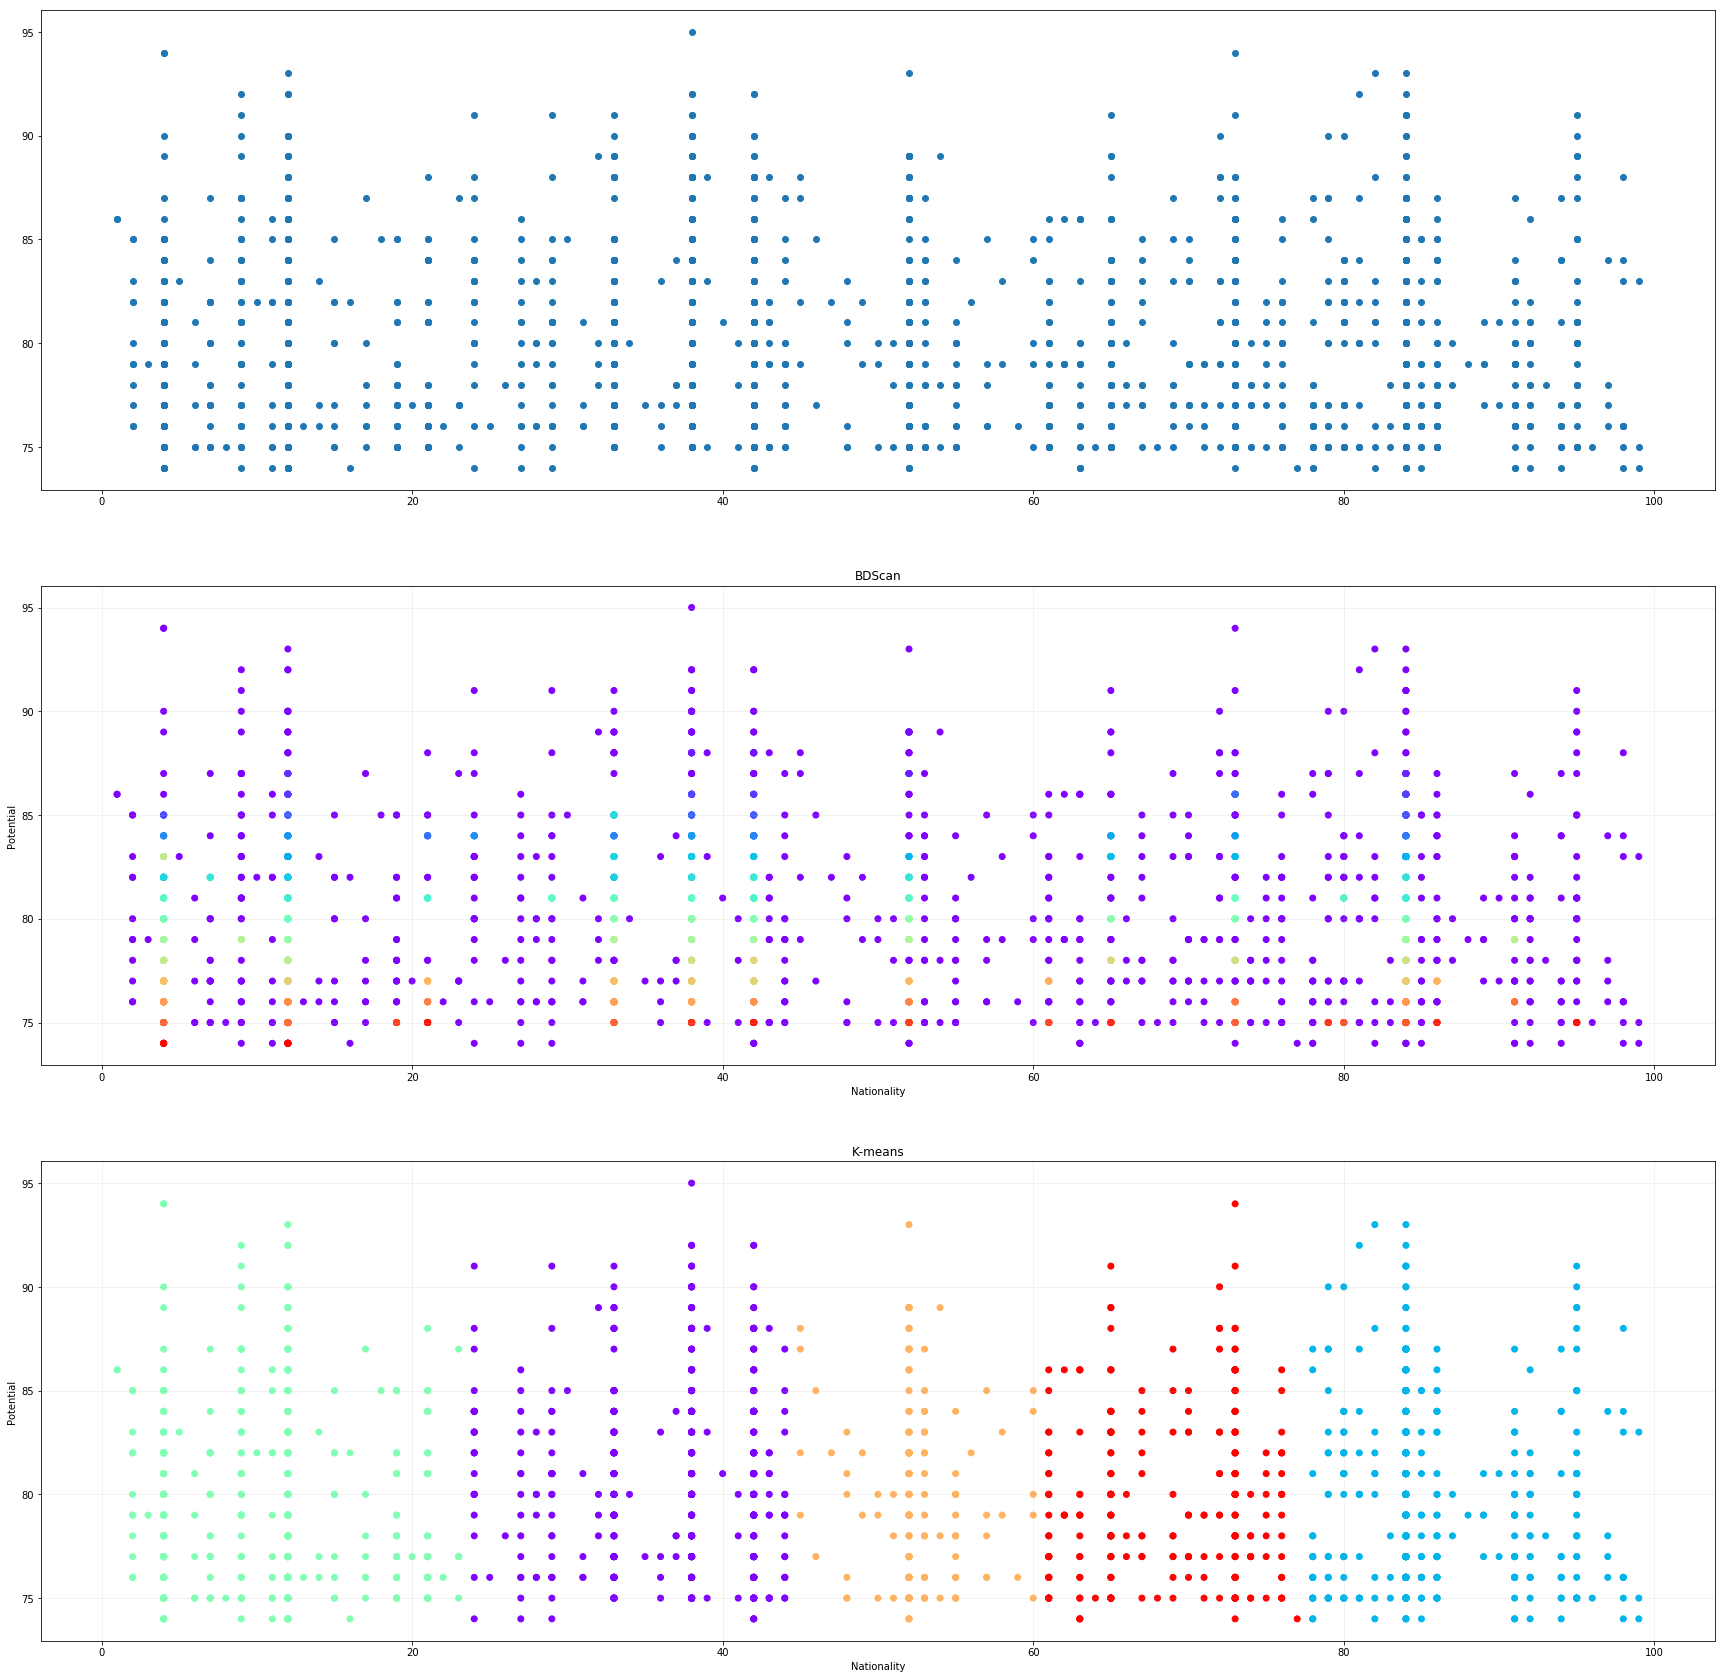

In [31]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(data)  

DBS = DBSCAN(eps=.0005)

DBS.fit(data) 
plt.figure(figsize=(30, 30))  


plt.subplot(311)
plt.scatter(data[:,0], data[:,1], cmap='rainbow') 


plt.subplot(312)
plt.title("BDScan")
plt.xlabel("Nationality")
plt.ylabel("Potential")
plt.grid(alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=DBS.labels_, cmap='rainbow')  



plt.subplot(313)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.xlabel("Nationality")
plt.ylabel("Potential")
plt.title("K-means")
plt.grid(alpha=0.2)

<img src="img/mapa.png" style="width:100%; height:550px">

Potential en función del uso del dominio de pierna mala del jugador

In [32]:
data = d.iloc[:, [11,5]].values  
data.shape

(1999, 2)

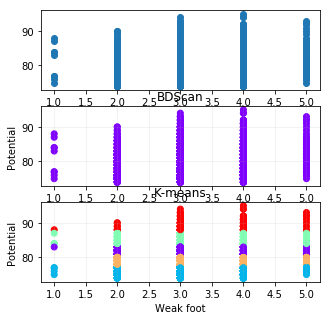

In [33]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(data)  

DBS = DBSCAN(eps=10)

DBS.fit(data) 
plt.figure(figsize=(5, 5))  


plt.subplot(311)
plt.scatter(data[:,0], data[:,1], cmap='rainbow') 


plt.subplot(312)
plt.title("BDScan")
plt.xlabel("Weak foot")
plt.ylabel("Potential")
plt.grid(alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=DBS.labels_, cmap='rainbow')  



plt.subplot(313)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.xlabel("Weak foot")
plt.ylabel("Potential")
plt.title("K-means")
plt.grid(alpha=0.2)

Potential en función de habilidad de la pierna buena

In [34]:
d.loc[d['Preferred Foot']=='Right','Preferred Foot']=1
d.loc[d['Preferred Foot']=='Left','Preferred Foot']=2

d['Preferred Foot']

0       2
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      2
14      1
15      2
16      1
17      2
18      1
19      2
20      1
21      1
22      1
23      1
24      2
25      1
26      2
27      1
28      1
29      1
       ..
1969    1
1970    2
1971    1
1972    1
1973    1
1974    1
1975    1
1976    1
1977    1
1978    1
1979    1
1980    2
1981    1
1982    2
1983    2
1984    1
1985    1
1986    2
1987    1
1988    1
1989    2
1990    2
1991    1
1992    1
1993    1
1994    1
1995    2
1996    2
1997    1
1998    1
Name: Preferred Foot, Length: 1999, dtype: int64

In [35]:
data = d.iloc[:, [9,5]].values  
data.shape

(1999, 2)

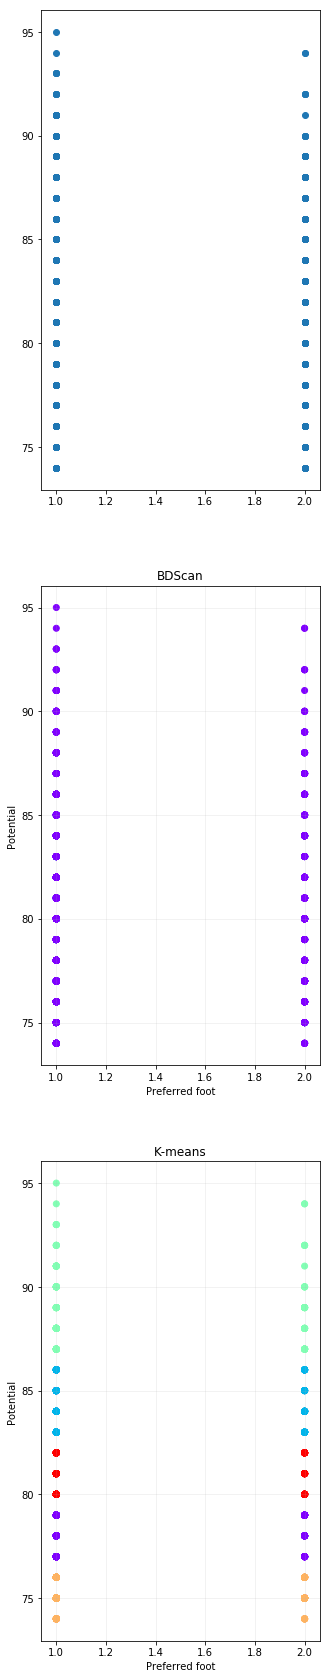

In [36]:
kmeans = KMeans(n_clusters=5)  
kmeans.fit(data)  

DBS = DBSCAN(eps=10)

DBS.fit(data) 
plt.figure(figsize=(5, 30))  


plt.subplot(311)
plt.scatter(data[:,0], data[:,1], cmap='rainbow') 


plt.subplot(312)
plt.title("BDScan")
plt.xlabel("Preferred foot")
plt.ylabel("Potential")
plt.grid(alpha=0.2)
plt.scatter(data[:,0], data[:,1], c=DBS.labels_, cmap='rainbow')  



plt.subplot(313)
plt.scatter(data[:,0], data[:,1], c=kmeans.labels_, cmap='rainbow') 
plt.xlabel("Preferred foot")
plt.ylabel("Potential")
plt.title("K-means")
plt.grid(alpha=0.2)